# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [57]:
import numpy as np


In [58]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('MNIST_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [104]:
type(y)

pandas.core.series.Series

In [116]:
X.shape

(70000, 784)

In [60]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [61]:
X.iloc[36000].shape

(784,)

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [62]:
new_shape=np.reshape(np.array(X.iloc[36000]),newshape=(28,28))

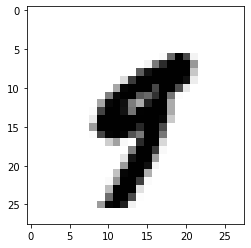

In [63]:
import matplotlib.pyplot as plt

plt.imshow(new_shape,cmap=plt.cm.binary,interpolation='nearest')

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [67]:
y.iloc[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [117]:
X_train=X[:60000]
X_test=X[60000:]
y_train=y[:60000]
y_test=y[60000:]

In [115]:
len(X_test)

64000

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [119]:
y5=np.where(y=='5',1,0)

In [120]:
y5_train=y5[:60000]
y5_test=y5[60000:]

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [121]:
from sklearn.linear_model import LogisticRegression

### Does the classifier predict correctly the 36000th digit we picked before?

In [122]:
len(y5)

70000

In [123]:
regressor=LogisticRegression()
regressor.fit(X_train,y5_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
predict=regressor.predict(X_train)

In [126]:
predict[36000]

0

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [128]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [134]:
never_5_clf.fit(X_train, y_train)
y_pred_n5 = never_5_clf.predict(X_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [137]:


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred_lr = regressor.predict(X_test)

print('Logistic regression')
print('====================')
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_lr))
print('-------------------')
print(f'Accuracy = {accuracy_score(y_test, y_pred_lr).round(4)}')
print(f'Precision = {precision_score(y_test, y_pred_lr, zero_division=0).round(4)}')
print(f'Recall = {recall_score(y_test, y_pred_lr).round(4)}')
print(f'F1 score = {f1_score(y_test, y_pred_lr).round(4)}')

print('\nNever 5 classifier')
print('====================')
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_n5))
print('-------------------')
print(f'Accuracy = {accuracy_score(y_test, y_pred_n5).round(4)}')
print(f'Precision = {precision_score(y_test, y_pred_n5, zero_division=0).round(4)}')
print(f'Recall = {recall_score(y_test, y_pred_n5).round(4)}')
print(f'F1 score = {f1_score(y_test, y_pred_n5).round(4)}')



Logistic regression
Confusion matrix


ValueError: Mix of label input types (string and number)

In [140]:
print(y_test)

60000    7
60001    2
60002    1
60003    0
60004    4
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 10000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [138]:
confusion_matrix(y_test, y_pred_lr)

ValueError: Mix of label input types (string and number)

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [142]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

# Logistic regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test,y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
display_lr = RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr)
display_lr.plot(name = 'Logistic Regression')

# Never 5 classifier
fpr_n5, tpr_n5, thresholds_n5 = roc_curve(y_test,y_pred_n5)
roc_auc_n5 = auc(fpr_n5, tpr_n5)
display_n5 = RocCurveDisplay(fpr=fpr_n5, tpr=tpr_n5)
display_n5.plot(name = 'Never 5 Classifier')

plt.show()

ValueError: multiclass format is not supported

### Now find the roc_auc_score for each. 

### What does this metric tell you? Which classifier works better with this metric in mind?